# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
temp_array = df.temperature
type(temp_array)

pandas.core.series.Series

In [5]:
len(temp_array)

130

In [6]:
temp_mean = np.mean(temp_array)
temp_std = np.std(temp_array)
temp_norm = np.random.normal(temp_mean, temp_std, size =130)

# 1. The theroetical normal distribution lays right on top of the observed distribution, according to this ECDF chart. Close enough to looking like normal dist. It is a normal dist.

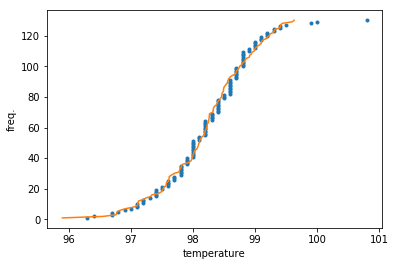

In [7]:
# 1. The theroetical normal distribution lays right on top of the observed distribution, according to this 
# ECDF chart. 

x = np.sort(temp_array)
y = np.arange(1, len(x)+1 / len(x))
_ = plt.plot(x, y, linestyle = 'none', marker='.')

a = np.sort(temp_norm)
b = np.arange(1, len(a)+1 / len(a))
_ = plt.plot(a, b)

_ = plt.xlabel('temperature')
_ = plt.ylabel('freq.')

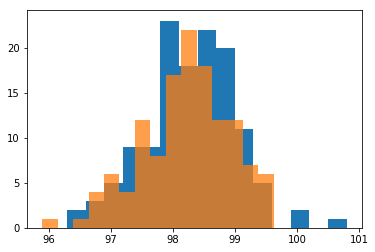

In [8]:
# 1. Close enough to looking like normal dist.
_ = plt.hist(temp_array, bins = 15)
_ = plt.hist(temp_norm, bins = 15, alpha = .75)
plt.show()

# #2. The sample is over 30, so it is large enough. The observations are independent, because the body tempurature of one obersation is not influenced by that of another. 

In [9]:
np.mean(temp_array)

98.24923076923078

In [10]:
temp = temp_array

# 3. Null hypothesis : mean = 98.6%. Alt hypothesis : mean < 98.6%. Reject the null hypothesis. P value less than 0.00.
# Use a one sample test because we are comparing a dataset to a proposed population mean without a dataset assiociated with it. 
# Use t score because we are unsure of the population standard deviation. 
# The t score is -5.4. I used the standard error of the sample to compute the Z score, which resulted in around -5.4. which is similar to the t test. 

In [11]:
# 3. Null hypothesis : mean = 98.6%. Alt hypothesis : mean < 98.6%.
temp_shifted = temp + 98.6 - np.mean(temp)

In [12]:
# Reject the null hypothesis. P value less than 0.00.
# Use a one sample test because we are comparing a dataset to a proposed population mean without a dataset 
# assiociated with it. 
# Use t score because we are unsure of the population standard deviation. 
bs_replicas = np.empty(1000)
for i in range(1000):
    bs_replicas[i] = np.mean(np.random.choice(temp_shifted, len(temp_shifted)))
p = np.sum(bs_replicas <= np.mean(temp))/len(bs_replicas)
print(p)

0.0


In [45]:
# using t-score
import scipy.stats
T = scipy.stats.ttest_1samp(temp, 98.6)
T

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [38]:
# Z score:
z = (np.mean(temp) - 98.6) / (np.std(temp)/np.sqrt(len(temp)))
print('Z-score is', z)

Z-score is -5.475925202078116


# 4. The correct test to use would be the t test since the population of ten is too small to use as an estimate of the population standard deviation. But interestingly, the Z and T score were similar anyways. 

In [41]:
# 4
drawten = np.random.choice(temp, 10)
drawten

array([ 99. ,  99. ,  97.8,  98. ,  99. , 100.8,  98.6,  99.2,  98.8,
        98.3])

In [42]:
# T test for sample of ten
scipy.stats.ttest_1samp(drawten, 98.6)

Ttest_1sampResult(statistic=0.9536552663394546, pvalue=0.3651678849403801)

In [43]:
# Z score for sample of ten
z10 = (np.mean(drawten) - 98.6) / (np.std(drawten)/np.sqrt(len(drawten)))
print(z10)

1.005240914749061


In [16]:
# 5. A tempurature below 98.12 or above 98.37 should be considered abnormal. 
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(temp, len(temp)))

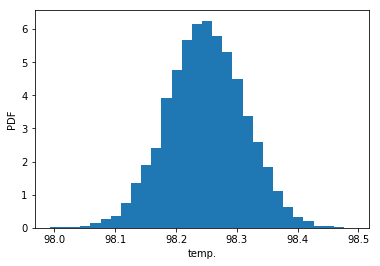

In [17]:
_ = plt.hist(bs_replicates, bins = 30, density = True)
_ = plt.xlabel('temp.')
_ = plt.ylabel('PDF')
plt.show()

In [18]:
con_int = np.percentile(bs_replicates, [2.5, 97.5])
con_int

array([98.12230769, 98.37230769])

In [58]:
SE = np.std(temp)/np.sqrt(len(temp))
max = np.mean(temp) + 1.96*SE
min = np.mean(temp) - 1.96*SE
print('frequentist confidence interval is', min,'-', max)

frequentist confidence interval is 98.12367980442819 - 98.37478173403336


# #5. A tempurature below 98.12 or above 98.37 should be considered abnormal. 

In [19]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [20]:
females = df.loc[df['gender']=='F'].temperature
males = df.loc[df['gender']=='M'].temperature

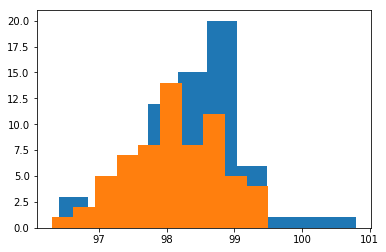

In [21]:
# 6. 
_ = plt.hist(females)
_ = plt.hist(males)

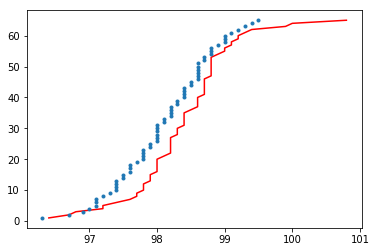

In [22]:
x = np.sort(females)
y = np.arange(1,len(x)+1/len(x))
_ = plt.plot(x,y, color='red')

a = np.sort(males)
b = np.arange(1,len(a)+1/len(a))
_ = plt.plot(a, b, linestyle='none', marker='.')

In [23]:
# Null hypothesis: The distribution of the females and males body temperatures are the same

In [24]:
both = np.concatenate((females, males))
perm = np.random.permutation(both)
perm_females = perm[:len(females)]
perm_males = perm[len(females):]

In [25]:
# Perm sample mean close to zero. obs sample mean .29. 
diff_means = np.mean(females) - np.mean(males)
diff_means

0.289230769230727

In [26]:
perm_replicates = np.empty(10000)
for i in range(10000):
    perm = np.random.permutation(both)
    perm1 = perm[:len(females)]
    perm2 = perm[len(females):]
    perm_replicates[i] = np.mean(perm1) - np.mean(perm2)

In [27]:
p = np.sum(perm_replicates >= (np.mean(females)-np.mean(males)))/len(bs_replicates)
print(p)

0.013


In [28]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_sample = np.random.choice(both, len(both))
    bs_replicates[i] = np.mean(bs_sample[:len(females)] - np.mean(bs_sample[len(females):]))
p_value = np.sum(bs_replicates >= (np.mean(females) - np.mean(males)))/len(bs_replicates)
print(p_value)

0.0111


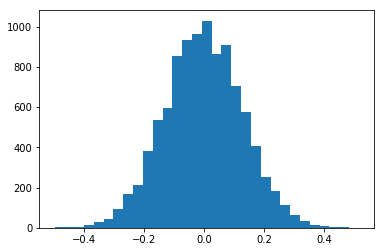

In [29]:
_ = plt.hist(perm_replicates, bins = 31)

# #6. Answer: There is a significant difference between the distributions of females and males, given that the p value of the difference in the observed means is about 0.13 under the null hypothesis. I used both the bootstraping and permutation method by splitting the dataset into two, a male and a female samples.
# Story: The mean of the sample is less then the claimed mean of the population. In addition, the female distribution is lower than that of men, which makes the women body temperature even more so less than the claimed population mean. 
